In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import scipy.signal as sig
from scipy.signal import find_peaks
from scipy.ndimage import shift
import itertools
import pickle
from pathlib import Path

from lmfit.models import GaussianModel, LinearModel

In [2]:
import pickle
#how to read
#fileObj = open('data/r76-80V-naitrig-100eV-goodchi.pkl', 'rb')
fileObj = open('data/r76_events_coincidencepeak_LE.pkl', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()
#print(exampleObj)

In [3]:
import statistics as st
def isRailed(v):
    if(np.isnan(v).any()):
        return True
    if(st.mode(v)==0):
        return True
    return False

In [4]:
#import singularity_pulseSave as sps
import pulseAnalysis as pa

pulse_struct = pa.parseEventList('../coin_analysis/data/r76-coinpeak-lt-50keV.txt')

#pulse_struct = sps.parseEventList('../coin_analysis/data/r76_events_coincidencepeak.txt')

   SeriesNumber  EventNumber
0   72209162200        20309
1   72209162200        40339
2   72209162200        50269
3   72209162200        60108
4   72209162200        60849
5   72209162200        80307
6   72209162200       100246
7   72209162200       110588
8   72209162200       110617
9   72209162200       120647
[72209162200 72209171225 72209172155]
[  20309   40339   50269   60108   60849   80307  100246  110588  110617
  120647  120688  130460  140628  150823  160296  170423  180002  180423
  230432  240270  270221  340151  340912  380054  380186  390511  420391
  420816  430710  440168  480387  480389  500725  520930  540170  540903
  550322  560707  560931  570415  580008  580723  590121  610172  610663
  610684  640653  650751  670228  670650  690338  710437  740337  750334
  750490  760179  770287  780145  780259  780278  780628  800530  810923
  820568  840012  840222  850265  860663  880573  880913  910282  920809
  920948  930239  930872  940631  950888  960920  970767 10

In [5]:
coindata = pd.read_csv("../coin_analysis/data/r76_events_coincidencepeak.txt", skiprows=3, engine='python',skipfooter=1,sep="*",skipinitialspace=True, \
            index_col=False, \
            names=['garbage','Row','SeriesNumber','EventNumber','PTOFdelay','pt_keVee'], \
            delim_whitespace=False)

series_nums = np.asarray(coindata['SeriesNumber'])
event_nums = np.asarray(coindata['EventNumber'])
EkeV = np.asarray(coindata['pt_keVee'])
PTOFdelay = np.asarray(coindata['PTOFdelay'])

def getEnergy(series,ev):
    energy = 0

    for i in range(0, len(series_nums)):
        if series_nums[i] == series:
            if event_nums[i] == ev:
                energy = (EkeV[i])
    return energy

def getBaseline(ptpulse):
    
    x = np.linspace(100, 250, 150)
    #print(len(x))
    y = ptpulse[100:250]
    #print(len(y))
    
    #print(x)
    #print(y)
    
    baseline_model = np.polyfit(x, y, 1)
    baseline_model_fn = np.poly1d(baseline_model)
    
    return(baseline_model_fn)

In [6]:
# ax1.fill_between(np.arange(0, best_cross + 1), bshifted_pT[:best_cross + 1], 0, color='gray', alpha=0.5)
                
              #      area = np.trapz(bshifted_pT[:best_cross + 1], dx=1)
                #    print("Area:", area)
def getPTPulse(pulses,series=72209162200,ev=20309,chan=[('Z1','PA'),('Z1','PB'),('Z1','PD'),('Z3','PA'),('Z3','PB'),('Z3','PD')]):
    ptpulse=[]
    ccount=0
    for c in chan:
        #print(c[0])
        pulse = pulses[c[0]][c[1]][series,ev]
        if(isRailed(pulse)):
            continue
        mean = np.mean(pulse[100:])
        #print(mean)
        pulse = pulse-mean
        #print(pulse)
        #print(np.size(ptpulse))
        if(ccount==0):
            ptpulse=pulse
        else:
            ptpulse+=pulse
        ccount+=1
        
    return ptpulse


def getPTPulseCD(pulses,series=72209162200,ev=20309):
    
    pulse = getPTPulse(pulses, series, ev)

    #adding discriminator
    D = 100

    end_values = pulse[3997:]
    
    CD_pulse = shift(pulse, D, cval=np.nan)

    #adding the cut off values to the front of the new pulse
    CD_pulse[0:99] = end_values
    #print(new_pulse)
        
    return CD_pulse

def getPeaks(CDPulse):
    peaks, _ = sig.find_peaks(CDPulse, height=2000, threshold = 85)
    numPeaks = len(peaks)
    return numPeaks
    

Series Number: 72209162200
Event Number: 3960091
Energy: 17.60991019162 keV


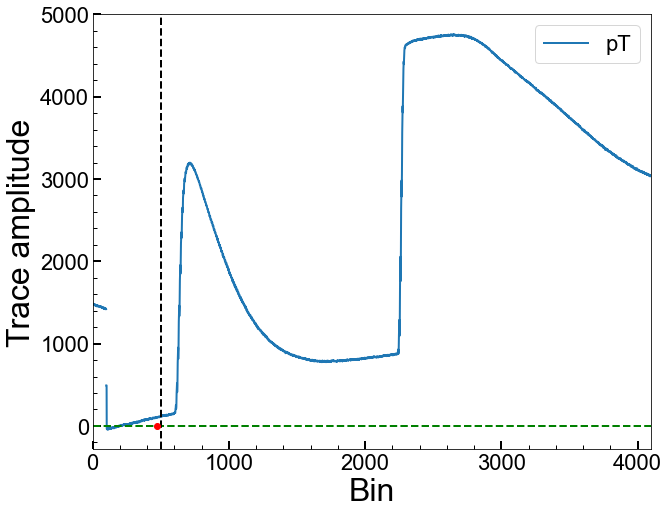

Series Number: 72209162200
Event Number: 3970008
Energy: 47.59264196986 keV


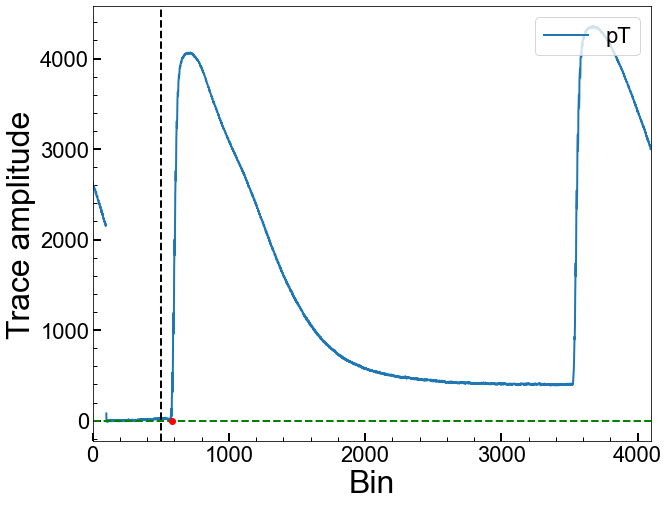

Series Number: 72209162200
Event Number: 4010538
Energy: 3.999107928438 keV


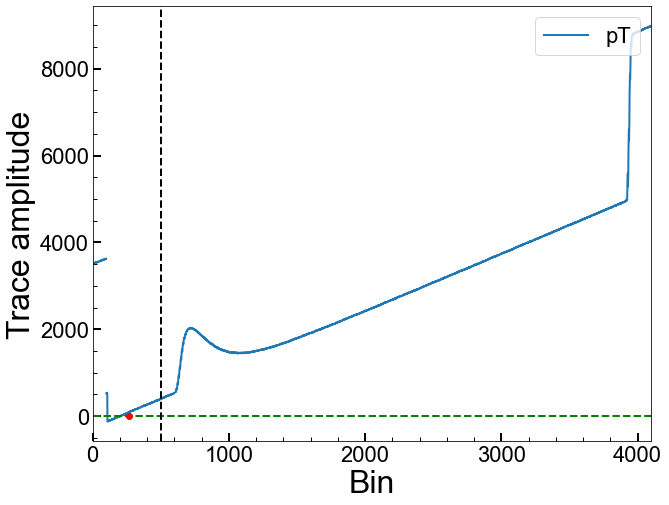

Series Number: 72209162200
Event Number: 4280711
Energy: 13.35888776314 keV


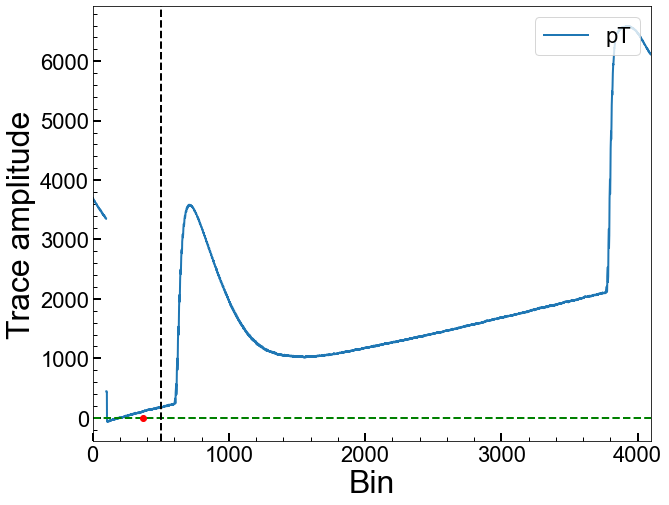

Series Number: 72209162200
Event Number: 4570724
Energy: 26.16305385866 keV


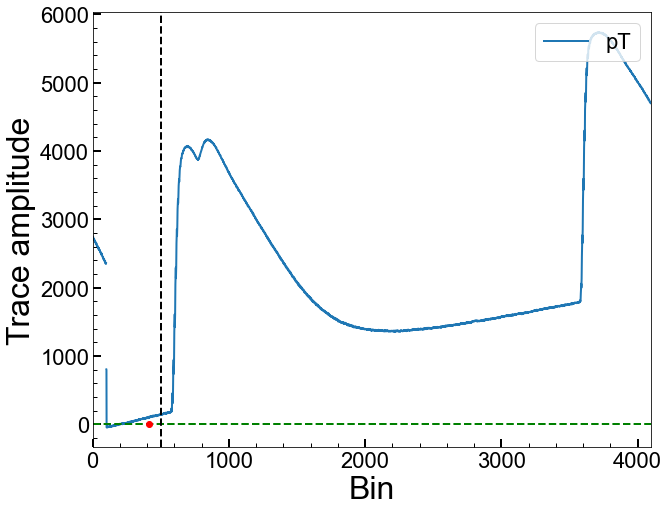

Series Number: 72209162200
Event Number: 4590916
Energy: 12.76370698041 keV


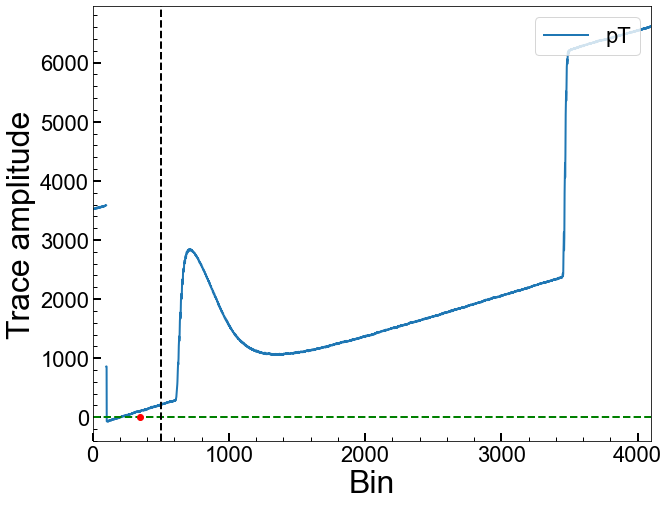

Series Number: 72209162200
Event Number: 5050732
Energy: 8.973632070046 keV


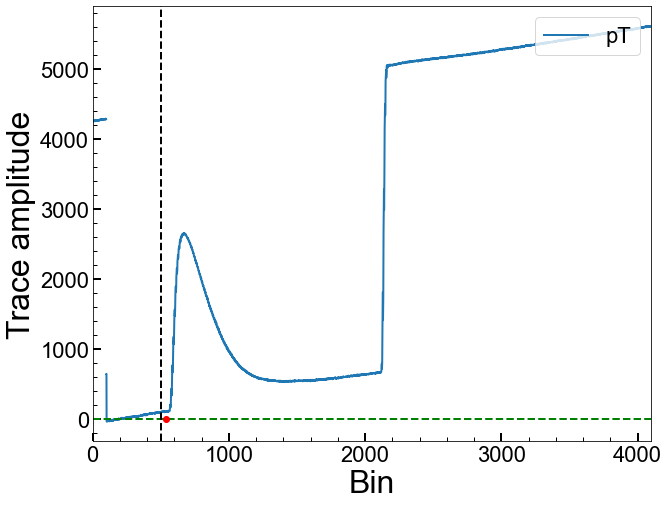

Series Number: 72209162200
Event Number: 5330668
Energy: 20.34911887457 keV


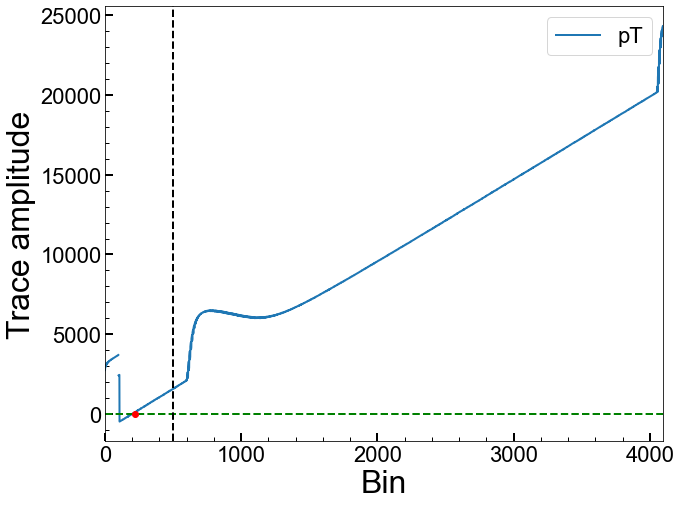

Series Number: 72209162200
Event Number: 5450253
Energy: 40.75614712118 keV


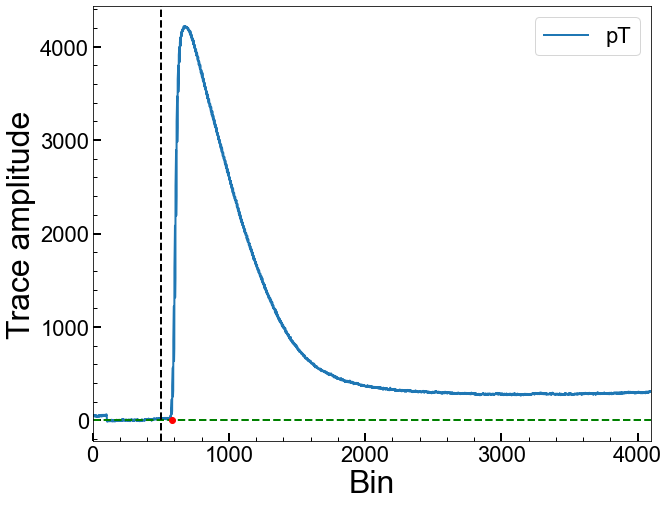

Series Number: 72209162200
Event Number: 5600555
Energy: 40.6637167237 keV


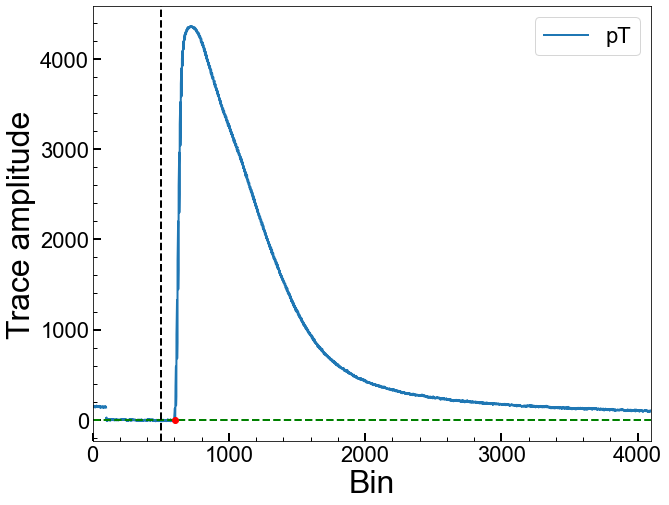

Series Number: 72209162200
Event Number: 5640434
Energy: 46.23784529851 keV


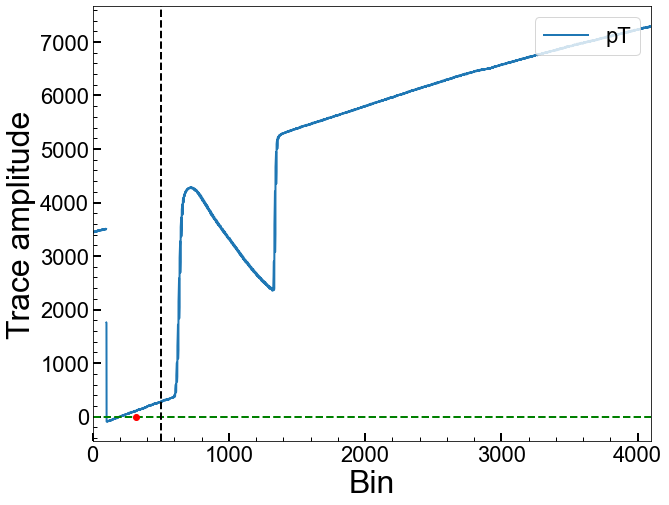

Series Number: 72209162200
Event Number: 5760180
Energy: 8.834725259576 keV


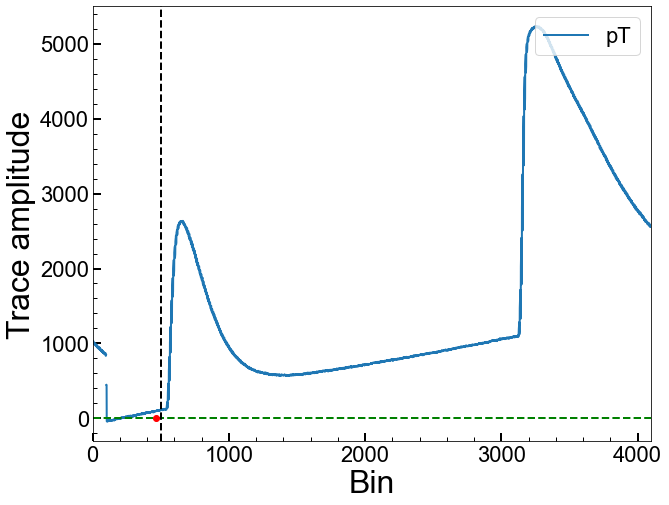

Series Number: 72209162200
Event Number: 5880059
Energy: 13.58616102547 keV


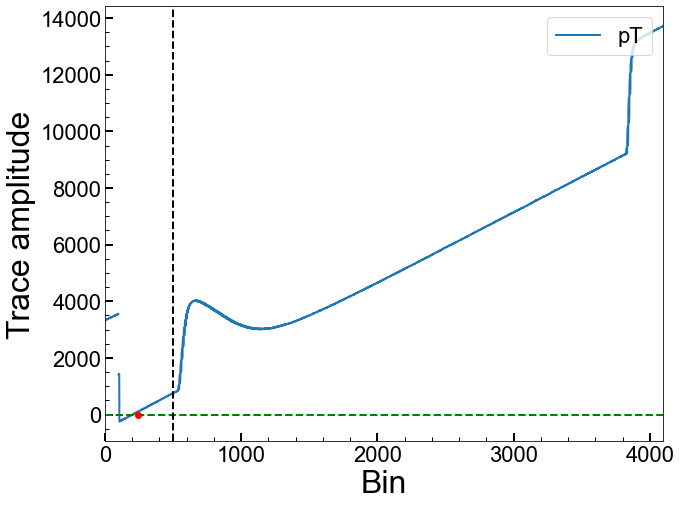

Series Number: 72209162200
Event Number: 5930599
Energy: 21.40179069798 keV


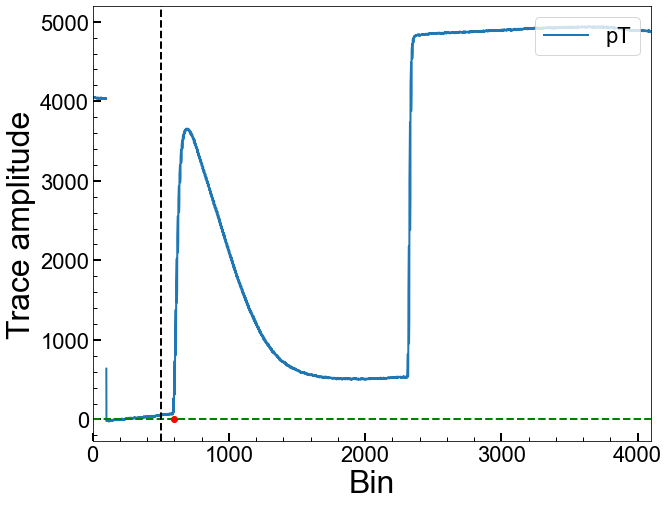

Series Number: 72209162200
Event Number: 6000522
Energy: 10.64594210321 keV


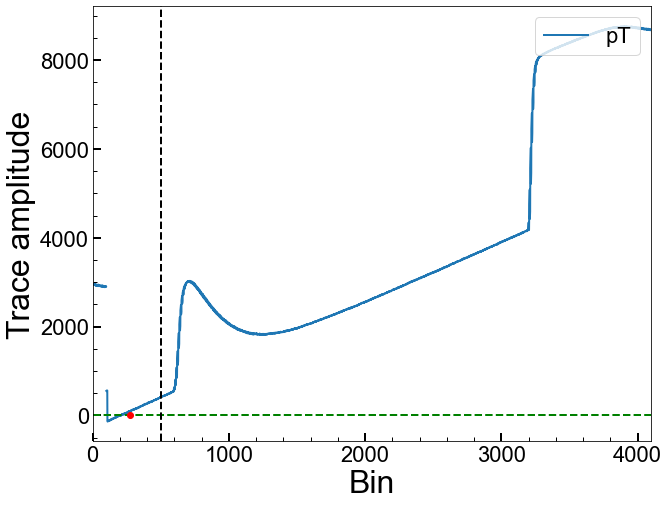

Series Number: 72209162200
Event Number: 6010388
Energy: 37.29845004939 keV


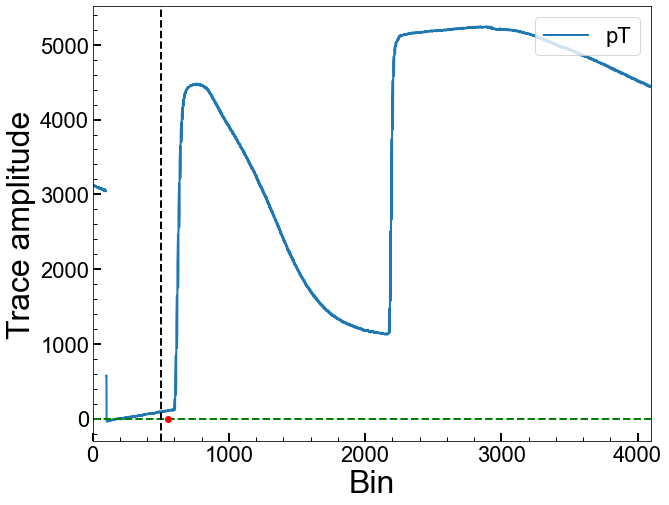

Series Number: 72209162200
Event Number: 6020467
Energy: 11.19189175251 keV


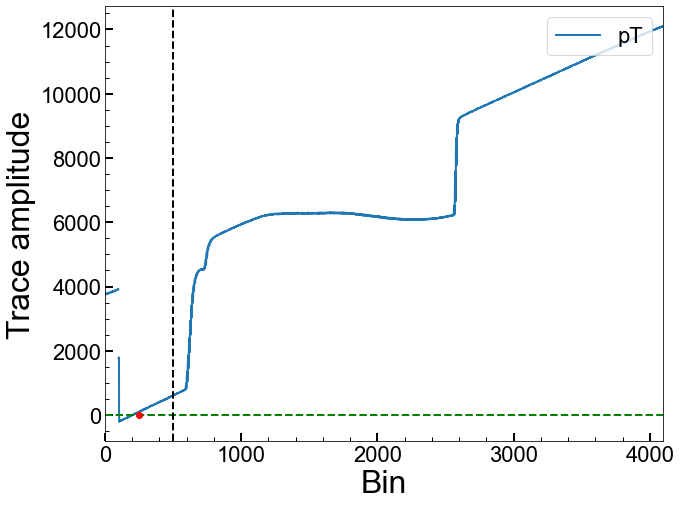

Series Number: 72209162200
Event Number: 6050033
Energy: 35.27750527578 keV


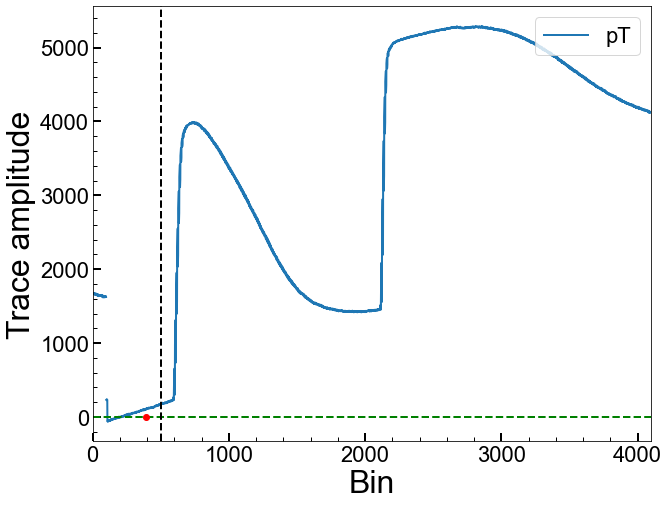

Series Number: 72209162200
Event Number: 6160887
Energy: 23.17755834173 keV


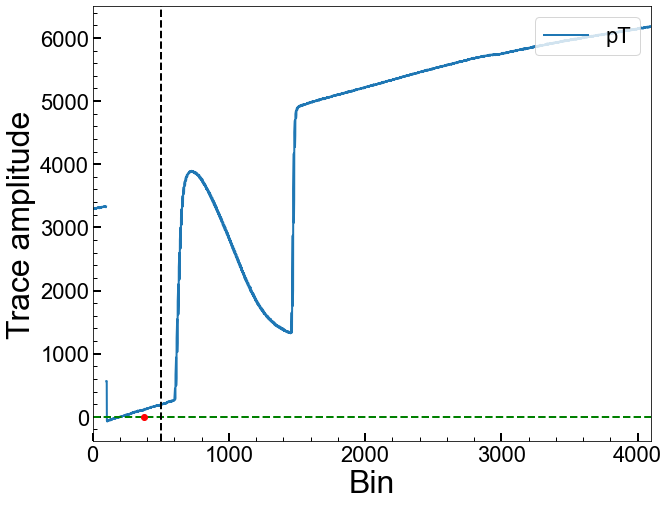

Series Number: 72209162200
Event Number: 6200672
Energy: 47.39710038879 keV


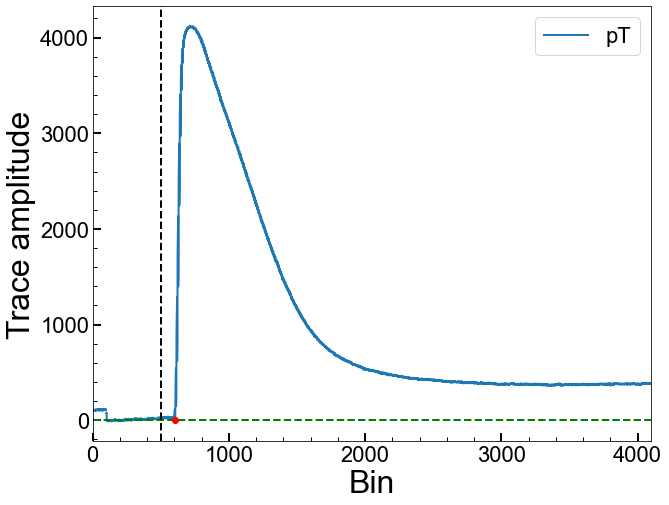

Series Number: 72209162200
Event Number: 6300457
Energy: 24.88910813262 keV


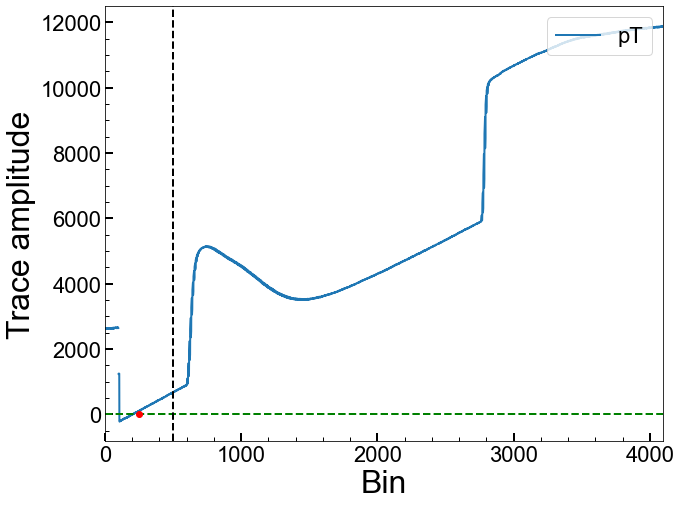

Series Number: 72209162200
Event Number: 6470790
Energy: 48.37486061023 keV


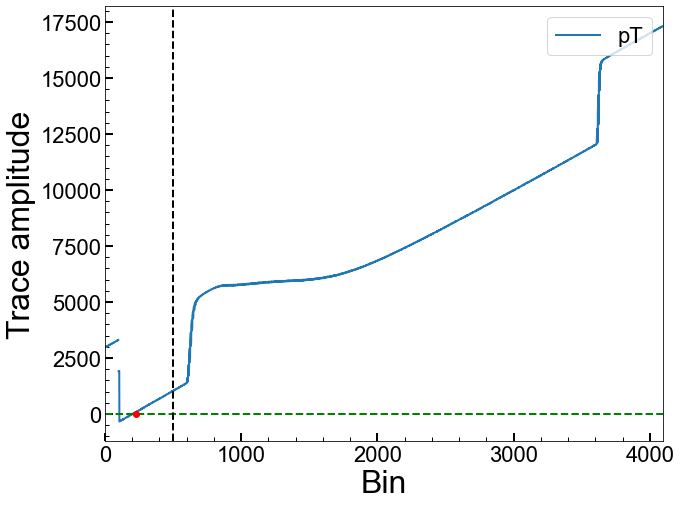

Series Number: 72209162200
Event Number: 6570296
Energy: 38.59146520713 keV


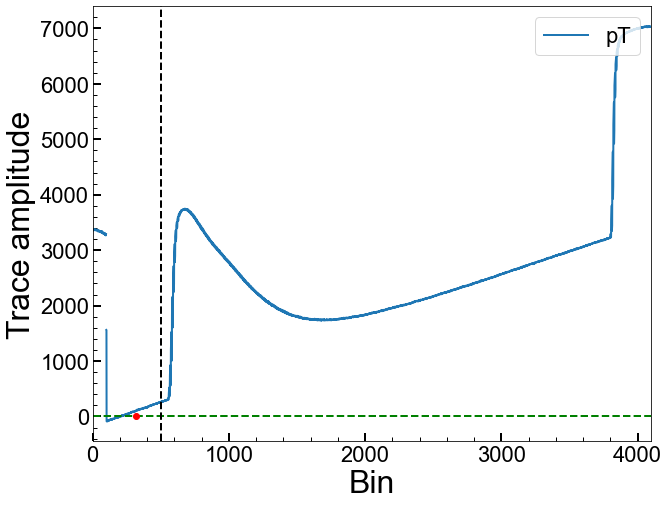

Series Number: 72209162200
Event Number: 6610717
Energy: 40.23007378752 keV


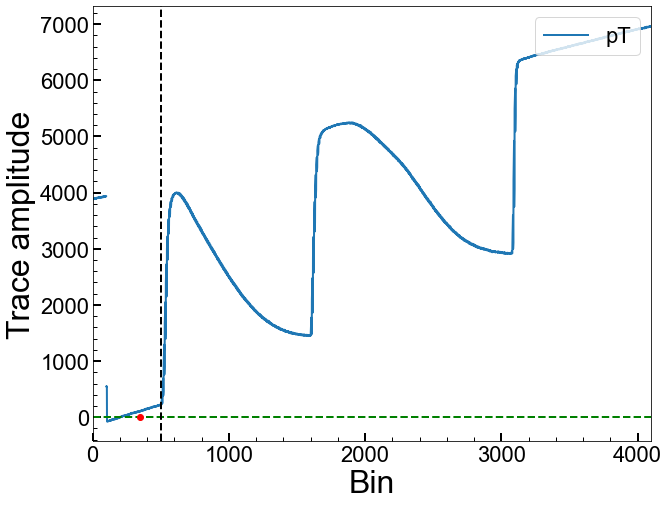

Series Number: 72209162200
Event Number: 6820549
Energy: 14.55882936696 keV


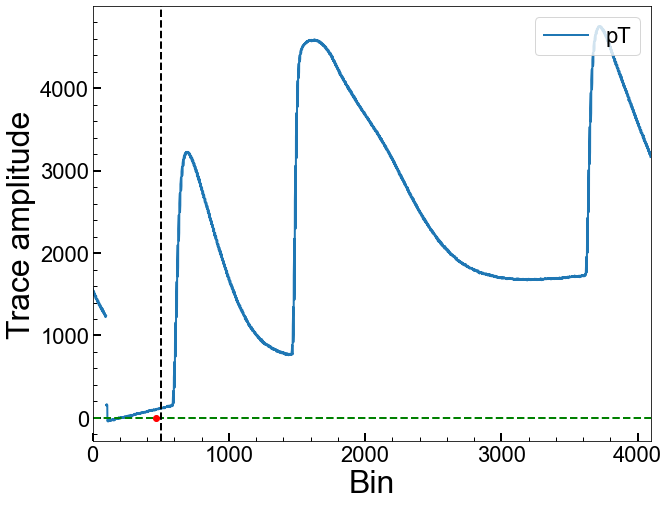

Series Number: 72209162200
Event Number: 7160810
Energy: 8.945300966353 keV


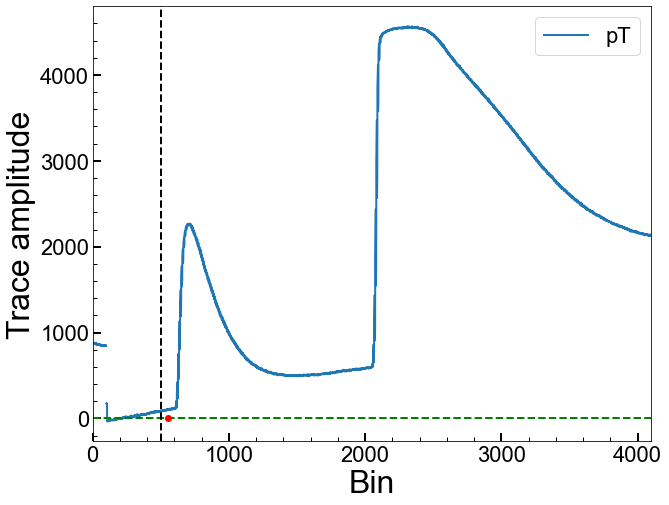

Series Number: 72209162200
Event Number: 7220890
Energy: 30.48805328357 keV


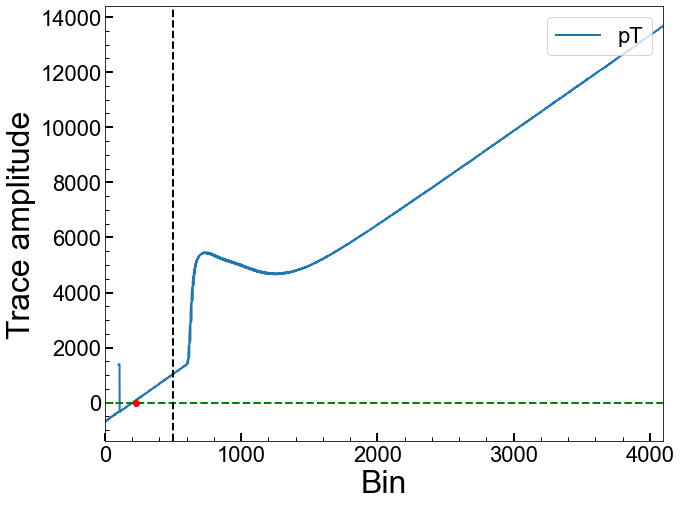

Series Number: 72209162200
Event Number: 7300339
Energy: 47.8145509351 keV


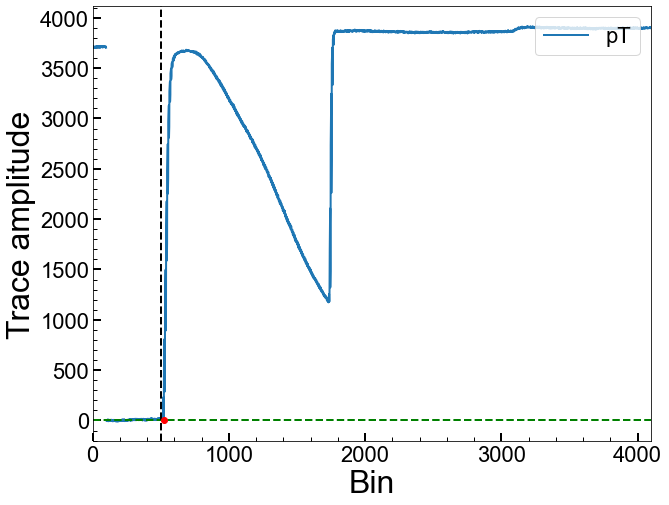

Series Number: 72209162200
Event Number: 7350213
Energy: 41.27186645363 keV


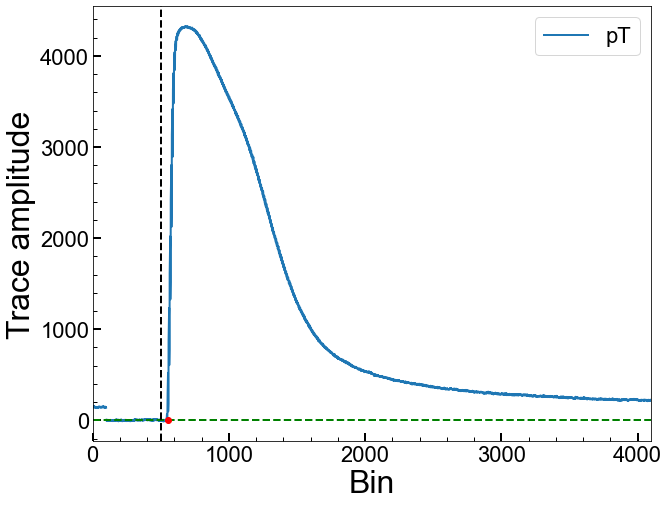

Series Number: 72209162200
Event Number: 7410314
Energy: 7.292607682607 keV


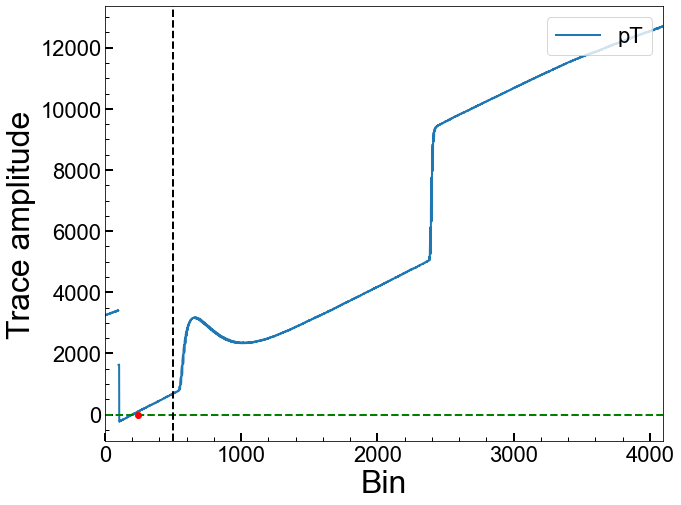

Series Number: 72209172155
Event Number: 1870008
Energy: 4.750556877943 keV


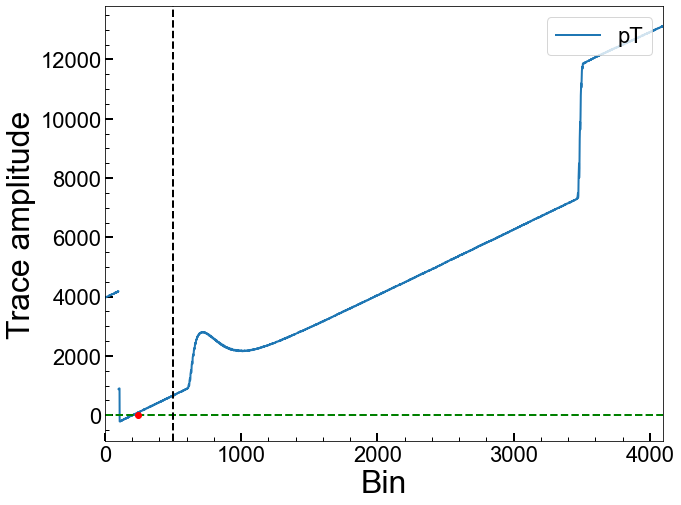

Series Number: 72209172155
Event Number: 2010568
Energy: 14.56993679059 keV


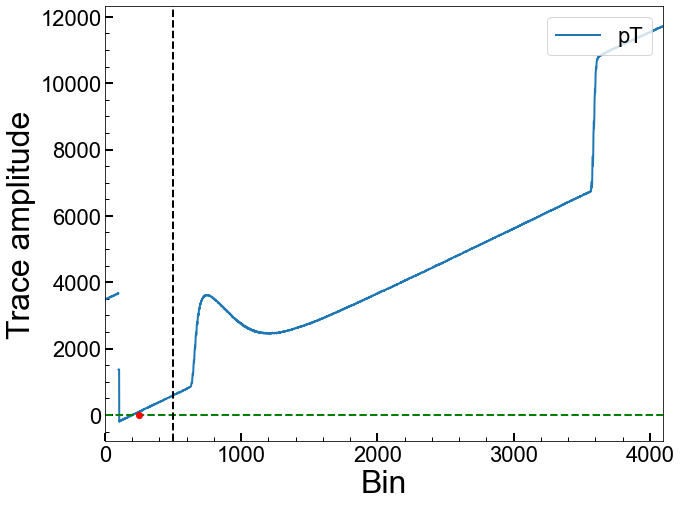

In [ ]:
plot=False

loops = 0
time_reg = []
energies = []
badTiming= []
badPileup=[]

for s in pulse_struct:
    ser=int(s.replace('_',''))
    for ev in pulse_struct[s]:
        
        #print(exampleObj['Z1']['PA'][ser,ev])
        energy = getEnergy(ser, ev)
        
        shownpulses=0
        
        #if energy > 51:
        #    continue

        #plt.subplot(8,12)
        if(not isRailed(exampleObj['Z1']['PA'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z1']['PA'][ser,ev],label="pC") # index 0 corresponds to first event
        if(not isRailed(exampleObj['Z1']['PB'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z1']['PB'][ser,ev],label="pF")
        if(not isRailed(exampleObj['Z1']['PD'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z1']['PD'][ser,ev],label="pE")
        if(not isRailed(exampleObj['Z3']['PA'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z3']['PA'][ser,ev],label="pB") # index 0 corresponds to first event
        if(not isRailed(exampleObj['Z3']['PB'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z3']['PB'][ser,ev],label="pA")
        if(not isRailed(exampleObj['Z3']['PD'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z3']['PD'][ser,ev],label="pD")
            
        pT = getPTPulseCD(exampleObj,ser,ev)+3000
        baseline = getBaseline(pT)
        xB = np.linspace(0, 4095, 4096)
        yB = baseline(xB)
        
        bshifted_pT = np.subtract(pT,yB)

        if(shownpulses>0):
                        
            crosses = np.isclose(bshifted_pT, 0, atol=100) #changed from 250
            
            #t = 0
            #for i in range(0,750):
            #    if (crosses[i] == True):
            #        time_reg.append(i)
            #        #print("Crosses at bin: " + str(i))
            #        energies.append(energy)
                    #t += 1
            #        break
                    
            best_cross = 0
            plot_cross = False
            
            for i in range(0, 1000):
                if (crosses[i] == True):
                    best_cross = i 
                    
            if best_cross != 0:
                time_reg.append(best_cross)
                #print("Crosses at bin: " + str(best_cross))
                energies.append(energy)
                #t += 1
                plot_cross = True
                if best_cross<500:
                    badTiming.append(loops)
                if getPeaks(bshifted_pT)>1:
                    badPileup.append(loops)

                    
            if (plot==True) and (getPeaks(bshifted_pT)>1):
                
                print("Series Number: " + str(ser))
                print("Event Number: " + str(ev))
                print("Energy: " + str(energy) + " keV")
        
                fig,axes = plt.subplots(1,1,figsize=(10.0,8.0),sharex=True)
                ax1 = axes
                
                ax1.plot(bshifted_pT, label="pT")
                #ax1.plot(xB, yB, color='r', linestyle="--", label="baseline")
                plt.axhline(y=0, color='g', linestyle="--")
                
                #ax1.plot((exampleObj['Z4']['PA'][ser,ev]/3)+2900-2650)
                #plt.title('PA')
                ax1.legend(loc=1,prop={'size':22})
                ax1.set_xlim(0,4096)
                ax1.set_xlabel('Bin')
                ax1.set_ylabel('Trace amplitude')
                plt.axvline(x=500,color='k',linestyle="--")
                
                if plot_cross == True:
                    ax1.plot(best_cross, 0, 'ro')
                   

                if shownpulses > 0:
                    #plt.savefig(f'figures/{energy}_keV_pulse.png')
                    plt.show()
                    
            #if t == 0:
            #    time_reg.append(0)
            
            loops += 1

In [ ]:
time_reg_array = np.asarray(time_reg)

delay = []
delay1 = []
delay2 = []

filt_energies = []
filt_energies1 = []
filt_energies2 = []
print(badPileup)
print(badTiming)

for i in range(len(time_reg_array)):
    #if (time_reg_array[i]-500) > 0:
    delay.append(time_reg_array[i])
    filt_energies.append(energies[i])
    if i not in badTiming:
        delay1.append(time_reg_array[i])
        filt_energies1.append(energies[i])
    if i not in badPileup:
        delay2.append(time_reg_array[i])
        filt_energies2.append(energies[i])
   


[330, 331, 335, 357, 378, 383, 412, 429, 437, 449, 455, 469, 482, 484, 491, 492, 495, 498, 503, 506, 514, 524, 534, 536, 543, 572, 576, 581, 586, 595, 1145, 1150]
[20, 41, 47, 49, 50, 60, 73, 82, 85, 91, 95, 109, 111, 118, 135, 141, 143, 147, 149, 151, 158, 159, 161, 177, 182, 183, 193, 195, 201, 204, 218, 220, 230, 231, 245, 252, 259, 266, 278, 291, 302, 317, 330, 335, 357, 374, 378, 383, 394, 419, 423, 429, 430, 439, 442, 455, 456, 466, 469, 471, 482, 485, 491, 495, 498, 500, 503, 507, 514, 523, 524, 534, 536, 543, 570, 576, 577, 583, 587, 590, 592, 595, 611, 625, 629, 643, 649, 654, 657, 664, 684, 689, 695, 701, 702, 706, 709, 721, 735, 771, 777, 778, 781, 783, 793, 808, 810, 818, 820, 821, 823, 825, 834, 835, 840, 843, 847, 851, 864, 866, 871, 876, 881, 890, 895, 906, 907, 908, 935, 936, 960, 967, 975, 982, 1010, 1021, 1024, 1033, 1037, 1049, 1059, 1068, 1078, 1085, 1096, 1107, 1110, 1113, 1118, 1130, 1131, 1138, 1145, 1150, 1152]


1156


(200.0, 700.0)

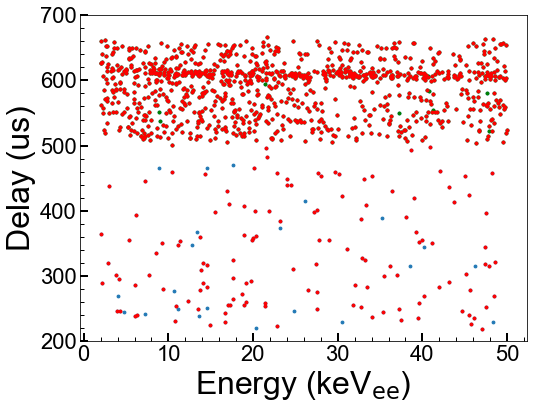

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(8,6))
ax1 = axs

print(len(filt_energies))
#print(len(delay))

ax1.scatter(filt_energies, delay, marker='o', s=8)
ax1.scatter(filt_energies1, delay1, color='green', marker='o', s=8)
ax1.scatter(filt_energies2, delay2, color = 'red', marker='o', s=8)

#ax1.axhline(y=(500/0.8), color='y', linestyle="--")


ax1.set(xlabel="Energy (keV$_{\mathrm{ee}}$)", ylabel="Delay (us)")
    
#plt.xlim(0, 200)
plt.ylim(200,700)